In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

To calculate RMSE do: np.sqrt(mse)

Will be uding adjacent close as target for training model

In [13]:
df = pd.read_csv('MSFT_daily_data.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400


In [20]:
df.isna().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Prev_Open         1
Prev_High         1
Prev_Low          1
Prev_Close        1
Prev_Adj_Close    1
Prev_Volume       1
dtype: int64

In [ ]:
df.shape

In [22]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Prev_Open,Prev_High,Prev_Low,Prev_Close,Prev_Adj_Close,Prev_Volume
count,9714.000000,9714.000000,9714.000000,9714.000000,9714.000000,9.714000e+03,9713.000000,9713.000000,9713.000000,9713.000000,9713.000000,9.713000e+03
mean,59.959366,60.571138,59.326086,59.971610,54.297099,5.661931e+07,59.921112,60.532913,59.288184,59.933717,54.258623,5.662360e+07
std,92.983547,93.832138,92.063776,92.994451,93.009370,3.813755e+07,92.911859,93.761301,91.992691,92.924212,92.936812,3.813717e+07
min,0.088542,0.092014,0.088542,0.090278,0.055665,2.304000e+06,0.088542,0.092014,0.088542,0.090278,0.055665,2.304000e+06
25%,5.742188,5.830078,5.656250,5.744141,3.541802,3.178000e+07,5.742188,5.828125,5.656250,5.742188,3.540599,3.179200e+07
50%,27.350000,27.660000,27.129999,27.389999,19.207578,4.980260e+07,27.350000,27.660000,27.129999,27.389999,19.207573,4.980320e+07
75%,46.878751,47.457500,46.433125,46.919998,38.846781,7.053310e+07,46.875000,47.450001,46.419998,46.919998,38.843502,7.053320e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,1.031789e+09,467.000000,468.350006,464.459991,467.559998,466.718781,1.031789e+09


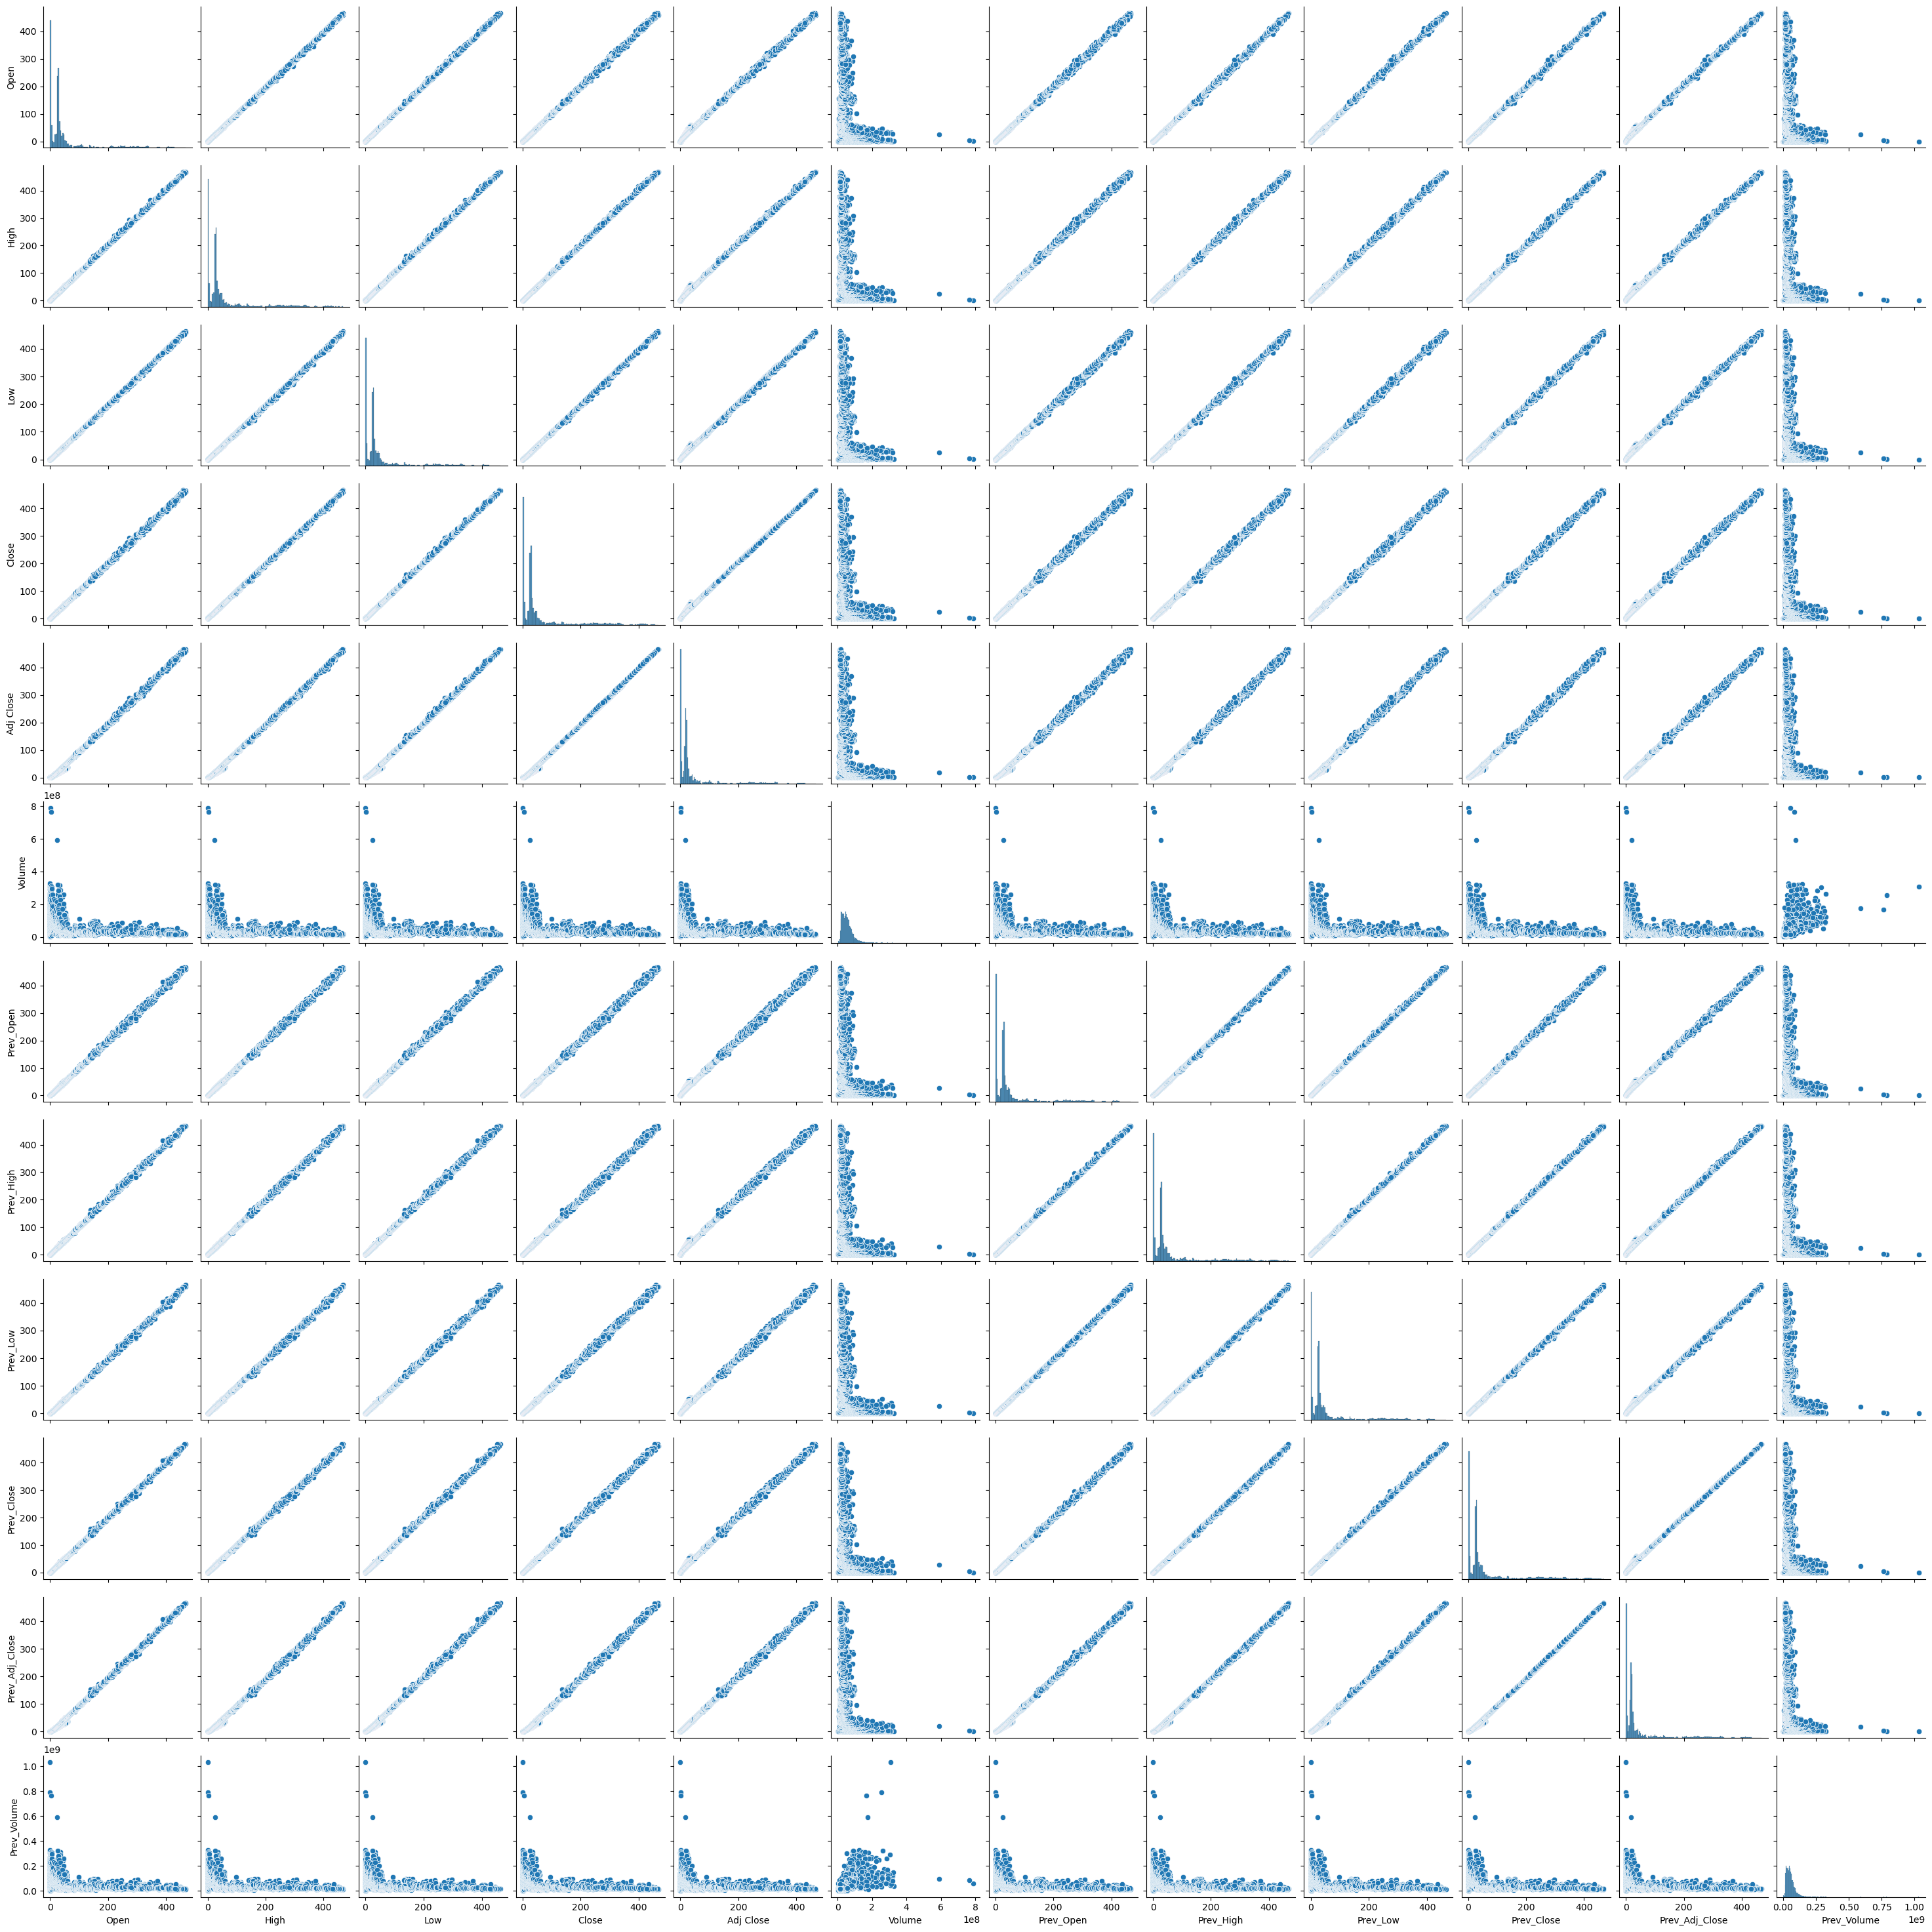

In [40]:
sns.pairplot(df)

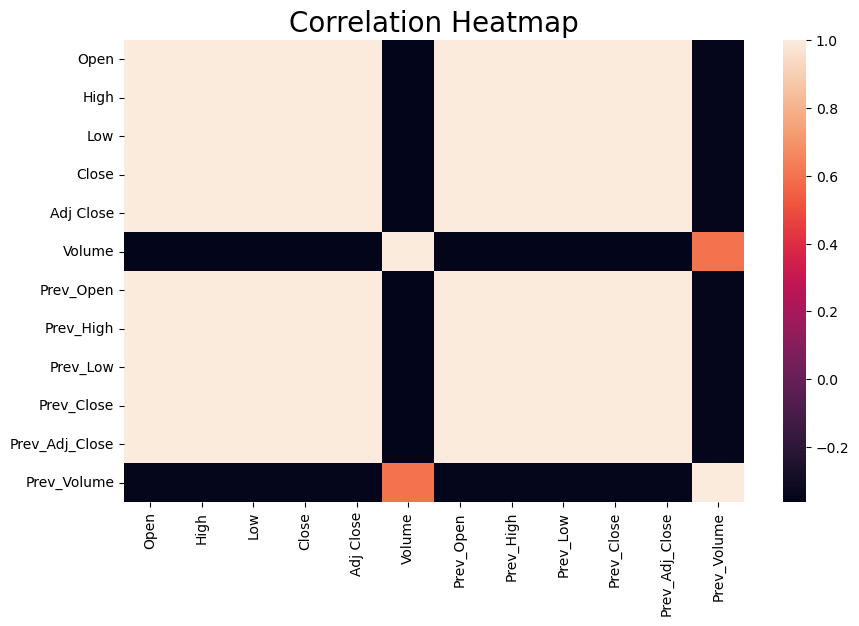

,Open,High,Low,Close,Adj Close,Volume,Prev_Open,Prev_High,Prev_Low,Prev_Close,Prev_Adj_Close,Prev_Volume
Open,1.000000,0.999948,0.999941,0.999875,0.998902,-0.359792,0.999812,0.999877,0.999885,0.999929,0.998956,-0.349091
High,0.999948,1.000000,0.999925,0.999937,0.998929,-0.358818,0.999792,0.999865,0.999837,0.999888,0.998883,-0.348473
Low,0.999941,0.999925,1.000000,0.999946,0.999002,-0.360943,0.999754,0.999802,0.999844,0.999873,0.998934,-0.349790
Close,0.999875,0.999937,0.999946,1.000000,0.999023,-0.359971,0.999709,0.999767,0.999773,0.999808,0.998841,-0.349175
Adj Close,0.998902,0.998929,0.999002,0.999023,1.000000,-0.359871,0.998739,0.998761,0.998832,0.998836,0.999822,-0.348935
Volume,-0.359792,-0.358818,-0.360943,-0.359971,-0.359871,1.000000,-0.359468,-0.358827,-0.360314,-0.359689,-0.359613,0.598823
Prev_Open,0.999812,0.999792,0.999754,0.999709,0.998739,-0.359468,1.000000,0.999948,0.999941,0.999875,0.998900,-0.349017
Prev_High,0.999877,0.999865,0.999802,0.999767,0.998761,-0.358827,0.999948,1.000000,0.999925,0.999937,0.998927,-0.348076
Prev_Low,0.999885,0.999837,0.999844,0.999773,0.998832,-0.360314,0.999941,0.999925,1.000000,0.999946,0.999000,-0.350128
Prev_Close,0.999929,0.999888,0.999873,0.999808,0.998836,-0.359689,0.999875,0.999937,0.999946,1.000000,0.999022,-0.349188


In [41]:
corr = df.drop(columns=['Date'], axis=1).corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr)

plt.title('Correlation Heatmap', fontsize=20)
plt.show()
corr

In [19]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [21]:
df['Prev_Open'] = df['Open'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Adj_Close'] = df['Adj Close'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)

In [23]:
df.isna().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Prev_Open         1
Prev_High         1
Prev_Low          1
Prev_Close        1
Prev_Adj_Close    1
Prev_Volume       1
dtype: int64

In [25]:
df.dropna(inplace=True)

In [27]:
df.drop(columns=['Date'], axis=1).corr()

,Open,High,Low,Close,Adj Close,Volume,Prev_Open,Prev_High,Prev_Low,Prev_Close,Prev_Adj_Close,Prev_Volume
Open,1.000000,0.999948,0.999941,0.999875,0.998902,-0.359792,0.999812,0.999877,0.999885,0.999929,0.998956,-0.349091
High,0.999948,1.000000,0.999925,0.999937,0.998929,-0.358818,0.999792,0.999865,0.999837,0.999888,0.998883,-0.348473
Low,0.999941,0.999925,1.000000,0.999946,0.999002,-0.360943,0.999754,0.999802,0.999844,0.999873,0.998934,-0.349790
Close,0.999875,0.999937,0.999946,1.000000,0.999023,-0.359971,0.999709,0.999767,0.999773,0.999808,0.998841,-0.349175
Adj Close,0.998902,0.998929,0.999002,0.999023,1.000000,-0.359871,0.998739,0.998761,0.998832,0.998836,0.999822,-0.348935
Volume,-0.359792,-0.358818,-0.360943,-0.359971,-0.359871,1.000000,-0.359468,-0.358827,-0.360314,-0.359689,-0.359613,0.598823
Prev_Open,0.999812,0.999792,0.999754,0.999709,0.998739,-0.359468,1.000000,0.999948,0.999941,0.999875,0.998900,-0.349017
Prev_High,0.999877,0.999865,0.999802,0.999767,0.998761,-0.358827,0.999948,1.000000,0.999925,0.999937,0.998927,-0.348076
Prev_Low,0.999885,0.999837,0.999844,0.999773,0.998832,-0.360314,0.999941,0.999925,1.000000,0.999946,0.999000,-0.350128
Prev_Close,0.999929,0.999888,0.999873,0.999808,0.998836,-0.359689,0.999875,0.999937,0.999946,1.000000,0.999022,-0.349188


In [29]:
month_df = pd.read_csv('MSFT_daily_data.csv')

In [31]:
year_df = pd.read_csv('MSFT_daily_data.csv')

In [33]:
month_df['PrevMonth_Open'] = month_df['Open'].shift(30)
month_df['PrevMonth_High'] = month_df['High'].shift(30)
month_df['PrevMonth_Low'] = month_df['Low'].shift(30)
month_df['PrevMonth_Close'] = month_df['Close'].shift(30)
month_df['PrevMonth_Adj_Close'] = month_df['Adj Close'].shift(30)
month_df['PrevMonth_Volume'] = month_df['Volume'].shift(30)

In [35]:
month_df.dropna(inplace=True)

In [37]:
year_df['PrevYear_Open'] = year_df['Open'].shift(365)
year_df['PrevYear_High'] = year_df['High'].shift(365)
year_df['PrevYear_Low'] = year_df['Low'].shift(365)
year_df['PrevYear_Close'] = year_df['Close'].shift(365)
year_df['PrevYear_Adj_Close'] = year_df['Adj Close'].shift(365)
year_df['PrevYear_Volume'] = year_df['Volume'].shift(365)

In [39]:
year_df.dropna(inplace=True)

In [41]:
month_df.drop(columns=['Date'], axis=1).corr()


,Open,High,Low,Close,Adj Close,Volume,PrevMonth_Open,PrevMonth_High,PrevMonth_Low,PrevMonth_Close,PrevMonth_Adj_Close,PrevMonth_Volume
Open,1.000000,0.999948,0.999941,0.999875,0.998906,-0.362199,0.996012,0.996053,0.996079,0.996069,0.995336,-0.347212
High,0.999948,1.000000,0.999925,0.999937,0.998933,-0.361222,0.996157,0.996204,0.996211,0.996210,0.995440,-0.346976
Low,0.999941,0.999925,1.000000,0.999946,0.999006,-0.363354,0.995826,0.995861,0.995899,0.995883,0.995188,-0.347476
Close,0.999875,0.999937,0.999946,1.000000,0.999028,-0.362378,0.995932,0.995971,0.995994,0.995983,0.995255,-0.347251
Adj Close,0.998906,0.998933,0.999006,0.999028,1.000000,-0.362162,0.995015,0.995022,0.995107,0.995067,0.996289,-0.346868
Volume,-0.362199,-0.361222,-0.363354,-0.362378,-0.362162,1.000000,-0.356852,-0.356587,-0.357101,-0.356881,-0.357444,0.286077
PrevMonth_Open,0.996012,0.996157,0.995826,0.995932,0.995015,-0.356852,1.000000,0.999946,0.999939,0.999872,0.998854,-0.345856
PrevMonth_High,0.996053,0.996204,0.995861,0.995971,0.995022,-0.356587,0.999946,1.000000,0.999923,0.999936,0.998883,-0.344876
PrevMonth_Low,0.996079,0.996211,0.995899,0.995994,0.995107,-0.357101,0.999939,0.999923,1.000000,0.999944,0.998957,-0.346995
PrevMonth_Close,0.996069,0.996210,0.995883,0.995983,0.995067,-0.356881,0.999872,0.999936,0.999944,1.000000,0.998980,-0.346018


In [43]:
year_df.drop(columns=['Date'], axis=1).corr()

,Open,High,Low,Close,Adj Close,Volume,PrevYear_Open,PrevYear_High,PrevYear_Low,PrevYear_Close,PrevYear_Adj_Close,PrevYear_Volume
Open,1.000000,0.999947,0.999940,0.999873,0.998958,-0.378257,0.954151,0.954623,0.953869,0.954260,0.957068,-0.331272
High,0.999947,1.000000,0.999924,0.999936,0.998987,-0.377237,0.954597,0.955059,0.954316,0.954698,0.957464,-0.331413
Low,0.999940,0.999924,1.000000,0.999945,0.999059,-0.379466,0.953942,0.954413,0.953660,0.954048,0.956888,-0.331279
Close,0.999873,0.999936,0.999945,1.000000,0.999081,-0.378446,0.954207,0.954674,0.953929,0.954313,0.957122,-0.331407
Adj Close,0.998958,0.998987,0.999059,0.999081,1.000000,-0.377869,0.953410,0.953855,0.953153,0.953517,0.958354,-0.331297
Volume,-0.378257,-0.377237,-0.379466,-0.378446,-0.377869,1.000000,-0.349722,-0.349524,-0.350012,-0.349776,-0.353136,0.188919
PrevYear_Open,0.954151,0.954597,0.953942,0.954207,0.953410,-0.349722,1.000000,0.999931,0.999924,0.999838,0.998105,-0.321469
PrevYear_High,0.954623,0.955059,0.954413,0.954674,0.953855,-0.349524,0.999931,1.000000,0.999898,0.999919,0.998152,-0.320042
PrevYear_Low,0.953869,0.954316,0.953660,0.953929,0.953153,-0.350012,0.999924,0.999898,1.000000,0.999923,0.998220,-0.323045
PrevYear_Close,0.954260,0.954698,0.954048,0.954313,0.953517,-0.349776,0.999838,0.999919,0.999923,1.000000,0.998267,-0.321628


Model using previous days data without PCA and standardization

In [47]:
X = df.drop(columns=['Close' , 'Open', 'High', 'Adj Close', 'Low', 'Volume', 'Date'], axis=1)
y = df['Close']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5827, 6), (3886, 6), (5827,), (3886,))

In [53]:
day_model = SGDRegressor()

In [55]:
day_model.fit(X_train, y_train)

SGDRegressor()

In [57]:
y_pred = day_model.predict(X_test)

In [154]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
rmse = np.sqrt(mse)

In [150]:
mse

3.355053165558419e+47

In [152]:
r2

-3.7618600057065626e+43

In [156]:
rmse

5.792282076658922e+23

In [3]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)

In [61]:
X_test_scaled = scaler.transform(X_test)

In [63]:
model = SGDRegressor()
model.fit(X_train_scaled, y_train)

SGDRegressor()

In [65]:
y_pred = model.predict(X_test_scaled)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [75]:
mse

4.309250453807612

In [73]:
r2

0.99951682443953

In [77]:
rmse

2.0758734195050557

In [79]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components = 3, random_state = 42) 

In [91]:
pca.fit(X_train_scaled)

PCA(n_components=3, random_state=42)

In [95]:
x_train_pca = pca.transform(X_train_scaled)
x_test_pca = pca.transform(X_test_scaled)

In [97]:
model = SGDRegressor()
model.fit(x_train_pca, y_train)

SGDRegressor()

In [99]:
y_pred = model.predict(x_test_pca)

In [101]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [103]:
mse

4.271231679648142

In [105]:
r2

0.9995210873021113

In [107]:
rmse

2.0666958362681584

In [ ]:
A